# Welcome to the Portfolio Analysis Challenge!
This Jupyter Notebook serves as a comprehensive introduction to the fundamentals of portfolio analysis. It demonstrates how to build insightful performance summaries using Python’s NumPy and Pandas libraries. You will learn how to compute key financial metrics such as returns, risk-adjusted returns, volatility and a variety of risk measures.

In the field of finance, it is essential to have a quick and effective way of assessing a portfolio’s performance. This is where a tearsheet proves invaluable. A tearsheet provides a concise yet informative overview of a portfolio’s key characteristics, allowing investors to rapidly identify its strengths and potential weaknesses. A well-designed tearsheet is an indispensable tool for making informed investment decisions.

## Challenge Overview
**1. Portfolio Analysis:**
- **Objective:** To develop functions that calculate key portfolio performance metrics using Pandas and NumPy.
- **Tasks:**
    - Calculate various return metrics, including daily returns and cumulative returns
    - Compute volatility measures, such as annualised volatility and beta
    - Calculate the Sharpe ratio, a common metric for evaluating risk-adjusted returns
    - Evaluate risk using metrics such as maximum drawdown and Value-at-Risk (VaR)
    - Generate a tearsheet, comprising a series of plots that visually summarise your portfolio’s performance

## Guidance
### Understanding Function Input/Output Types:
```python
example_function(df: pd.DataFrame) -> float:
    return df.cov().iloc[0, 1]
```
Please verify that your function returns a float when indicated. Incorrect data types may cause your submission to be marked incorrectly.

### Testing & Grading
To aid in the performance evaluation of your functions, test cases are provided for each challenge. Subsequently, the functions will be graded using hidden tests.

If you fail a sample test, you will be given an `AssertionError`. It is advised that you continue to work on the step until you pass the sample tests.

In [4]:
# Libraries to be used throughout this challenge
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter

from AmplifyQuantTrading import Data

plt.style.use("_mpl-gallery")

In [ ]:
# HIDDEN PARAMETERS

<hr style="border: none; height: 2px; background-color: #bcbcbc">

# Challenge 1: Portfolio Analysis
### Summary
This challenge focuses on the core aspects of evaluating investment portfolios, giving you practical experience in assessing performance and risk. Understanding these characteristics is key for any investor.

### Imported Data
The variables `portfolio_prices` and `benchmark_prices` are Pandas DataFrames, available for your use. `portfolio_prices` contains **price data** for a portfolio of assets. Additionally, `benchmark_prices` contains **price data** for a relevant benchmark index against which the portfolio's performance will be compared.

Additionally, the variable `sample_prices` is a Pandas DataFrame intended for unit testing. It contains sample **price data** that will be used to evaluate the performance of your functions.

In [5]:
portfolio_prices = Data.get_price_series("Portfolio_Analysis_Portfolio_Prices", True)
benchmark_prices = Data.get_price_series("Portfolio_Analysis_Benchmark_Prices", True)
sample_prices = Data.get_price_series("Sample_Prices", True)

<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 1: Return
This first step centres on the calculation of various return metrics for the portfolio. Our analysis will encompass daily returns, expected returns, the minimum and maximum returns observed and the cumulative returns achieved.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Daily Return
The daily return of a portfolio quantifies the percentage by which its value has either increased or decreased over a single trading day. This is typically calculated based on the change in the portfolio's market price or net asset value. Your task is to implement a function that, given a Pandas DataFrame, computes the daily return and returns it as a Pandas DataFrame. Calculate the daily return using the Pandas functions `pct_change()` and `dropna()`.

In [12]:
def daily_return(prices: pd.DataFrame) -> pd.DataFrame:
    # Insert your answer code here
    daily_return = prices.pct_change().dropna()
    return daily_return

    

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Sample Tests
The code provided below will call the `daily_return()` function, passing the Pandas DataFrame `sample_prices` as an argument. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

In [13]:
# SAMPLE GRADING
ans_1 = daily_return(sample_prices)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [-0.02962009014810041, 0.02440633245382573, -0.028827674567584838]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

Output Data:

Ticker      Sample 1
date                
2001-07-03 -0.001845
2001-07-05 -0.027726
2001-07-06 -0.036122
2001-07-09 -0.005424
2001-07-10 -0.018344
...              ...
2002-08-26 -0.001871
2002-08-27 -0.024375
2002-08-28 -0.028828
2002-08-29  0.024406
2002-08-30 -0.029620

[290 rows x 1 columns]

Output Type: DataFrame, Output Shape: (290, 1)

Expected Type: DataFrame, Expected Shape: (290, 1)

Passed: True



<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Expected Return
The expected return is another useful metric. The expected daily return can be determined using the Pandas function `mean()`, which calculates the arithmetic average of the daily returns. The expected return is defined to be
$$\mu_d=\mathbb{E}[R],$$
$$\mu_m=21\times\mathbb{E}[R],$$
$$\mu_y=252\times\mathbb{E}[R],$$
where $\mu_d$ is the expected daily return, $\mu_m$ is the expected monthly return and $\mu_y$ is the expected yearly return. Your task is to implement a function that given the daily return, $R$, computes the expected daily, monthly and yearly return **in that order!** Ensure that the three values returned are **Floats** or **NumPy Floats!**

In [20]:
def expected_return(R: pd.DataFrame) -> (np.float64, np.float64, np.float64):
    # Insert your answer code here
    mu_d = R.mean().values[0]
    mu_m = mu_d * 21
    mu_y = mu_d * 252
    return (np.float64(mu_d), np.float64(mu_m), np.float64(mu_y))

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `expected_return()` function. Verify that your function's outputs are the correct numerical value and of the correct data type.

The code provided below will also perform hidden tests to evaluate your `expected_return()` function.

In [21]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = expected_return(R)
print(f"Output Type: {type(ans_1).__name__}({type(ans_1[0]).__name__}, {type(ans_1[1]).__name__}, {type(ans_1[2]).__name__}), Output Length: {len(ans_1)}\n")
print("Expected Type: tuple(float64, float64, float64), Expected Length: 3\n")
sol_1 = [-0.0008929622691871521, -0.018752207652930196, -0.22502649183516235]
for i in range(3):
    assert sol_1[i] == ans_1[i]
    assert type(ans_1[i]).__name__ == "float64"
assert (type(ans_1).__name__ == "tuple") and (len(ans_1) == 3)
print("Passed: True\n")

Output Type: tuple(float64, float64, float64), Output Length: 3

Expected Type: tuple(float64, float64, float64), Expected Length: 3

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Minimum/Maximum Return
Understanding the highest and lowest returns a portfolio has achieved across different periods is also valuable. Your task is to implement a function that, given the daily return and a frequency, returns the **minimum** and **maximum return** of that period **in that order!** Below is code that groups and sums the daily return by a certain frequency e.g., by week, month or even year.
```python
R.groupby(pd.Grouper(freq="ME")).sum()
```
In this example, $R$ is the daily return and the string "ME" refers to a monthly grouping. Following this code, the minimum/maximum return should be computed using the Pandas function `min()` or `max()`. Ensure that the two values returned are **Floats** or **NumPy Floats!**

In [30]:
def minmax_return(R: pd.DataFrame, freq: str) -> (np.float64, np.float64):
    # Insert your answer code here
    period_returns = R.groupby(pd.Grouper(freq=freq)).sum()
    minimum = period_returns.min().values[0]
    maximum = period_returns.max().values[0]
    return(np.float64(minimum), np.float64(maximum))

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `minmax_return()` function. Verify that your function's outputs are the correct numerical value and of the correct data type.

The code provided below will also perform hidden tests to evaluate your `minmax_return()` function.

In [31]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = minmax_return(R, "ME")
print(f"Output Type: {type(ans_1).__name__}({type(ans_1[0]).__name__}, {type(ans_1[1]).__name__}), Output Length: {len(ans_1)}\n")
print("Expected Type: tuple(float64, float64), Expected Length: 2\n")
sol_1 = [-0.14213926971337232, 0.13653427829276155]
for i in range(2):
    assert sol_1[i] == ans_1[i]
    assert type(ans_1[i]).__name__ == "float64"
assert (type(ans_1).__name__ == "tuple") and (len(ans_1) == 2)
print("Passed: True\n")

Output Type: tuple(float64, float64), Output Length: 2

Expected Type: tuple(float64, float64), Expected Length: 2

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Cumulative Return
One of the most crucial metrics for evaluating the historical performance of a portfolio is its cumulative return. This metric provides a clear picture of the overall growth of an investment over a specific period. The cumulative return can be computed using the formula
$$C_t=\prod_{i=0}^{t}(R_i+1),$$
where $C_t$ is the cumulative return at the $t$-th data point and $R_i$ is the return at the $i$-th data point.

Your task is to implement a function that, given the daily return, computes the cumulative return and returns it as a Pandas DataFrame. Calculate the cumulative return using the Pandas Function `cumprod()`. Ensure that the output of your function is a Pandas DataFrame.

In [34]:
def cum_return(R: pd.DataFrame) -> pd.DataFrame:
    # Insert your answer code here
    cum_return = (1+R).cumprod()
    return(cum_return)

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `cum_return()` function. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

The code provided below will also perform hidden tests to evaluate your `cum_return()` function.

In [35]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = cum_return(R)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [0.6951107011070112, 0.716328413284133, 0.6992619926199264]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

Output Data:

Ticker      Sample 1
date                
2001-07-03  0.998155
2001-07-05  0.970480
2001-07-06  0.935424
2001-07-09  0.930351
2001-07-10  0.913284
...              ...
2002-08-26  0.738007
2002-08-27  0.720018
2002-08-28  0.699262
2002-08-29  0.716328
2002-08-30  0.695111

[290 rows x 1 columns]

Output Type: DataFrame, Output Shape: (290, 1)

Expected Type: DataFrame, Expected Shape: (290, 1)

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Higher Moments
Lastly, we will determine the skewness and kurtosis of the portfolio's daily return. The significance of this lies in the fact that, in the real world, investment returns rarely follow a textbook normal distribution. To demonstrate this deviation, let's visualise it with a graph.

The variable `example_prices` is a Pandas DataFrame that contains example **price data**, used to demonstrate non-normal return.

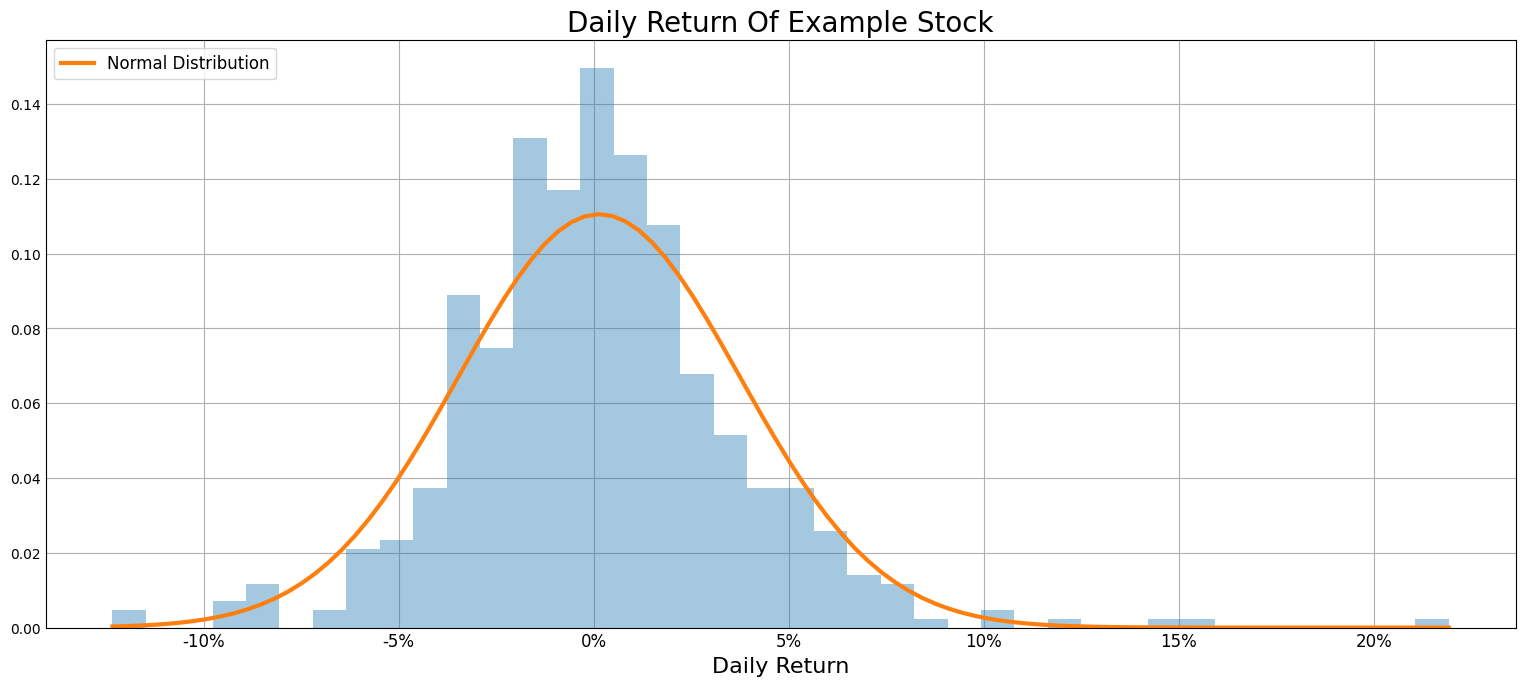

In [36]:
# Import neccessary library
from scipy.stats import norm

# Import the price data
example_prices = Data.get_price_series("Portfolio_Analysis_Example_Prices", True)


def percent_formatter_0(x, pos):
    return f"{x:.0f}%"


# Compute daily return as a percentage for plotting
y = example_prices.pct_change().dropna() * 100

# Initialise an axis for plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Histogram: Daily return of example stock
ax.hist(y, bins=40, density=True, alpha=0.4)
x_axis = np.linspace(np.min(y), np.max(y), 100)
ax.plot(
    x_axis,
    norm.pdf(x_axis, y.mean(), y.std()),
    lw=3,
    label="Normal Distribution",
)
ax.set_title("Daily Return Of Example Stock", fontsize=20)
ax.set_xlabel("Daily Return", fontsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(percent_formatter_0))
ax.xaxis.set_tick_params(labelsize=12)
ax.legend(loc="upper left", fontsize=12)

plt.show()

As is evident, the daily returns do not exhibit a normal distribution. Skewness and kurtosis are valuable in elucidating the asymmetry and tail behaviour of these returns. Below is code that prints the skeweness and the kurtosis of the example return data for you.

In [37]:
ex_skew = example_prices.pct_change().dropna().skew().iloc[0]
ex_kurt = example_prices.pct_change().dropna().kurt().iloc[0]
print(f"Skeweness: {ex_skew}\n")
print(f"Kurtosis: {ex_kurt}")

Skeweness: 0.6541704359535628

Kurtosis: 3.8838006223978714


<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 2: Volatility
This second step centres on the calculation of various volatility metrics for the portfolio. Our analysis will include annual volatility, rolling volatility, beta, and the rolling beta observed.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Annual Volatility
Annual volatility in a portfolio refers to the degree of fluctuation in its value over a year, typically expressed as a percentage. It's a measure of how much the portfolio's returns are expected to deviate from their average, and a higher volatility indicates greater risk. The annual volatility can be computed using the formula
$$\sigma_y=\sqrt{252\times\text{Var}[R]}=\sqrt{252\times\left(\mathbb{E}[R^2]-\mathbb{E}^2[R]\right)},$$
where $\sigma_y$ is the annual volatility and $R$ is the daily return.

Your task is to implement a function that, given a Pandas DataFrame, computes the annual volatility and returns it as a Float or NumPy Float. Calculate the annual volatility using the NumPy function `sqrt()` and either Pandas function: `var()` or `std()`.

In [51]:
def annual_vol(R: pd.DataFrame) -> np.float64:
    # Insert your answer code here
    annual_vol = np.sqrt(252*R.var()).values[0]
    return(np.float64(annual_vol))

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `annual_vol()` function. Verify that your function's output is the correct numerical value and of the correct data type.

The code provided below will also perform hidden tests to evaluate your `annual_vol()` function.

In [52]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = annual_vol(R)
print(f"Output Value: {ans_1}, Output Type: {type(ans_1).__name__}\n")
print("Expected Value: 0.4272882640330177, Expected Type: float64\n")
sol_1 = 0.4272882640330177
assert (ans_1 == sol_1) and (type(ans_1).__name__ == "float64")
print("Passed: True\n")

Output Value: 0.4272882640330177, Output Type: float64

Expected Value: 0.4272882640330177, Expected Type: float64

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Rolling Volatility
As another approach, we might want to visualise the fluctuations in a portfolio's volatility over time. This can be done by calculating the annualised rolling volatility of our portfolio. The annualised rolling volatility can be computed using the formula
$$\sigma_{t, w}=\sqrt{252\times\text{Var}[R_{t, w}]},$$
where $\sigma_{t, w}$ represents the annualised volatility calculated over a rolling window of length $w$ at time $t$, and $R_{t, w}$ denotes the series of return data from the $(t-w+1)$-th data point up to the $t$-th data point.

Your task is to implement a function that, given a Pandas DataFrame and an integer denoting the window length, computes the annualised rolling volatility and returns it as a Pandas DataFrame. Compute the annualised rolling volatility using the NumPy function `sqrt()`, the Pandas function `rolling()` and either Pandas function: `var()` or `std()`.

In [58]:
def rolling_vol(R: pd.DataFrame, window: int) -> pd.DataFrame:
    # Insert your answer code here
    rolling_vol = np.sqrt(252*R.rolling(window).var())
    return(rolling_vol)
    

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `rolling_vol()` function. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

The code provided below will also perform hidden tests to evaluate your `rolling_vol()` function.

In [59]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = rolling_vol(R, 21 * 3)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [0.5184514775353356, 0.5182588513131442, 0.5201239852361912]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

Output Data:

Ticker      Sample 1
date                
2001-07-03       NaN
2001-07-05       NaN
2001-07-06       NaN
2001-07-09       NaN
2001-07-10       NaN
...              ...
2002-08-26  0.515158
2002-08-27  0.517418
2002-08-28  0.520124
2002-08-29  0.518259
2002-08-30  0.518451

[290 rows x 1 columns]

Output Type: DataFrame, Output Shape: (290, 1)

Expected Type: DataFrame, Expected Shape: (290, 1)

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Beta
An important risk metric is beta, which measures how volatile a security is relative to the general market. In essence, it demonstrates the degree to which a security's price tends to move in tandem with wider market trends. Notably, when $\beta>1$, the portfolio exhibits greater volatility than the benchmark, and conversely, when $\beta<1$, it demonstrates lower volatility. Beta can be computed using the formula
$$\beta=\frac{\text{Cov}(R_p, R_b)}{\text{Var}[R_b]}=\frac{\mathbb{E}[R_pR_b]-\mathbb{E}[R_p]\mathbb{E}[R_b]}{\mathbb{E}[R_b^2]-\mathbb{E}^2[R_b]},$$
where $\beta$ is the beta of the portfolio in comparison to the benchmark, $R_p$ is the return of the portfolio and $R_b$ is the return of the benchmark.

Your task is to implement a function that, given two Pandas DataFrame, computes the beta and returns it as a Float or NumPy float. Below is code that computes the covariance between two datasets using Pandas.
```python
R_p.iloc[:, 0].cov(R_b.iloc[:, 0])
```
In addition to this code, use either Pandas function: `var()` or `std()`. Ensure that your function returns a **Float** or **NumPy Float!**

In [109]:
def beta(R_p: pd.DataFrame, R_b: pd.DataFrame) -> np.float64:
    # Computing the covariance is given to you, .iloc[:, 0] is just
    # a way to access the entire first column of data
    # Insert your answer code here
    cov = R_p.iloc[:, 0].cov(R_b.iloc[:, 0])
    var = R_b.iloc[:, 0].var()
    return np.float64(cov / var)

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `beta()` function. Verify that your function's output is the correct numerical value and of the correct data type.

The code provided below will also perform hidden tests to evaluate your `beta()` function.

In [110]:
# SAMPLE GRADING
R_p = daily_return(sample_prices)
R_b = daily_return(sample_prices + 5)
ans_1 = beta(R_p, R_b)
print(f"Output Value: {ans_1}, Output Type: {type(ans_1).__name__}\n")
print("Expected Value: 1.296146485830518, Expected Type: float64\n")
sol_1 = 1.296146485830518
assert (ans_1 == sol_1) and (type(ans_1).__name__ == "float64")
print("Passed: True\n")

Output Value: 1.296146485830517, Output Type: float64

Expected Value: 1.296146485830518, Expected Type: float64



AssertionError: 

In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Rolling Beta
As another approach, we might want to visualise the fluctuations in a portfolio's beta over time. This can be done by computing the rolling beta of our portfolio. The rolling beta of a portfolio can be computed using the formula
$$\beta_{t, w}=\frac{\text{Cov}(R_{p, t, w}, R_{b, t, w})}{\text{Var}[R_{b, t, w}]}=\frac{\mathbb{E}[R_{p, t, w}R_{b, t, w}]-\mathbb{E}[R_{p, t, w}]\mathbb{E}[R_{b, t, w}]}{\mathbb{E}[R_{b, t, w}^2]-\mathbb{E}^2[R_{b, t, w}]},$$
where $\beta_{t, w}$ represents the beta calculated over a rolling window of length $w$ at time $t$, $R_{p, t, w}$ denotes the series of portfolio return data from the $(t-w+1)$-th data point up to the $t$-th data point, and $R_{b, t, w}$ denotes the series of benchmark return data from the $(t-w+1)$-th data point up to the $t$-th data point.

Your task is to implement a function that, given a Pandas DataFrame and an integer denoting the window length, computes the rolling beta and returns it as a Pandas DataFrame. Below is code that computes the rolling covariance between two datasets using Pandas.
```python
R_p.iloc[:, 0].rolling(window).cov(R_b.iloc[:, 0])
```
In this example, `window` is an integer referring to the window length. In addition to this code, use either Pandas function: `var()` or `std()`. Ensure that your function returns a Pandas DataFrame.

In [115]:
def rolling_beta(R_p: pd.DataFrame, R_b: pd.DataFrame, window: int) -> pd.DataFrame:
    # Computing the covariance is given to you, .iloc[:, 0] is just
    # a way to access the entire first column of data
    cov = R_p.iloc[:, 0].rolling(window).cov(R_b.iloc[:, 0])

    # Insert your answer code here
    var = R_b.iloc[:, 0].rolling(window).var()
    rolling_beta = cov / var
    return rolling_beta.to_frame(name="rolling_beta")

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `rolling_beta()` function. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

The code provided below will also perform hidden tests to evaluate your `rolling_beta()` function.

In [116]:
# SAMPLE GRADING
R_p = daily_return(sample_prices)
R_b = daily_return(sample_prices + 5)
ans_1 = rolling_beta(R_p, R_b, 21 * 3)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [1.3369219908431684, 1.33690374330508, 1.3366711560422386]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

Output Data:

            rolling_beta
date                    
2001-07-03           NaN
2001-07-05           NaN
2001-07-06           NaN
2001-07-09           NaN
2001-07-10           NaN
...                  ...
2002-08-26      1.336878
2002-08-27      1.336714
2002-08-28      1.336671
2002-08-29      1.336904
2002-08-30      1.336922

[290 rows x 1 columns]

Output Type: DataFrame, Output Shape: (290, 1)

Expected Type: DataFrame, Expected Shape: (290, 1)

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 3: Risk-Adjusted Return
This stage focuses on the computation of several risk-adjusted return metrics for the portfolio. These metrics assess the return achieved relative to the risk taken. Our analysis will encompass the Sharpe ratio, which provides a single measure of risk-adjusted return using the excess return over a risk-free rate and the portfolio's standard deviation. We will also examine the rolling Sharpe ratio, which calculates this metric over a moving window of time, offering insights into how the risk-adjusted return has evolved.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Sharpe Ratio
The Sharpe ratio is a widely used measure that quantifies an investment's return relative to the risk taken to achieve that return. Your task is to create a function that calculates the Sharpe ratio, given the daily return and an annual risk-free rate. The Sharpe ratio can be computed using the formula
$$S=\frac{\mu_y-r_f}{\sigma_y},$$
where $\mu_y$ is the expected annual return, $r_f$ is the annual risk-free rate and $\sigma_y$ is the annual volatility.

Your task is to implement a function that, given a Pandas DataFrame and a float denoting the annual risk-free rate, computes the Sharpe ratio and returns it as a Float or NumPy float. Calculate the expected annual return using your function `expected_return()` and extracting $\mu_y$ and calculate the annual volatility by using your function `annual_vol()`.

<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 3: Risk-Adjusted Return
This stage focuses on the computation of several risk-adjusted return metrics for the portfolio. These metrics assess the return achieved relative to the risk taken. Our analysis will encompass the Sharpe ratio, which provides a single measure of risk-adjusted return using the excess return over a risk-free rate and the portfolio's standard deviation. We will also examine the rolling Sharpe ratio, which calculates this metric over a moving window of time, offering insights into how the risk-adjusted return has evolved.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Sharpe Ratio
The Sharpe ratio is a widely used measure that quantifies an investment's return relative to the risk taken to achieve that return. Your task is to create a function that calculates the Sharpe ratio, given the daily return and an annual risk-free rate. The Sharpe ratio can be computed using the formula
$$S=\frac{\mu_y-r_f}{\sigma_y},$$
where $\mu_y$ is the expected annual return, $r_f$ is the annual risk-free rate and $\sigma_y$ is the annual volatility.

Your task is to implement a function that, given a Pandas DataFrame and a float denoting the annual risk-free rate, computes the Sharpe ratio and returns it as a Float or NumPy float. Calculate the expected annual return using your function `expected_return()` and extracting $\mu_y$ and calculate the annual volatility by using your function `annual_vol()`.

In [146]:
def sharpe_ratio(R: pd.DataFrame, r_f: float) -> np.float64:
    # Insert your answer code here
    mu_y = 252 * R.mean().values[0]
    sigma = annual_vol(R)
    sharpe_ratio = (mu_y - r_f)/sigma
    return np.float64(sharpe_ratio)

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `sharpe_ratio()` function. Verify that your function's output is the correct numerical value and of the correct data type.

The code provided below will also perform hidden tests to evaluate your `sharpe_ratio()` function.

In [147]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = sharpe_ratio(R, 0.01)
print(f"Output Value: {ans_1}, Output Type: {type(ans_1).__name__}\n")
print("Expected Value: -0.5500420011933707, Expected Type: float64\n")
sol_1 = -0.5500420011933707
assert (ans_1 == sol_1) and (type(ans_1).__name__ == "float64")
print("Passed: True\n")

Output Value: -0.5500420011933707, Output Type: float64

Expected Value: -0.5500420011933707, Expected Type: float64

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Rolling Sharpe Ratio
Similar to rolling volatility and beta, the rolling Sharpe ratio helps visualise how the risk-adjusted return changes over time. The Sharpe ratio of a portfolio can be computed using the formula
$$S_{t, w}=\frac{\mu_{t, w}-r_f}{\sigma_{t, w}}, $$
where $S_{t, w}$ represents the Sharpe ratio calculated over a rolling window of length $w$ at time $t$, $\mu_{t, w}$ denotes the annualised expected return of the portfolio computed using the series of return data from the $(t-w+1)$-th data point up to the $t$-th data point, $r_f$ is the annual risk-free rate, and $\sigma_{t, w}$ denotes the annualised volatility of the portfolio computed using the series of return data from the $(t-w+1)$-th data point up to the $t$-th data point.

Your task is to implement a function that, given a Pandas DataFrame, a float denoting the risk-free rate and an integer denoting the window length, computes the rolling Sharpe ratio and returns it as a Pandas DataFrame. To compute the rolling Sharpe ratio, use the Pandas function `rolling()`, `mean()` and use your function `rolling_vol()`.

In [164]:
def rolling_sharpe(R: pd.DataFrame, r_f: float, window: int) -> np.float64:
    # Insert your answer code here
    rolling_mu_y = R.rolling(window).mean() * 252
    rolling_sigma = rolling_vol(R, window)
    rolling_sharpe = (rolling_mu_y - r_f)/rolling_sigma
    return rolling_sharpe
    

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `rolling_sharpe()` function. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

The code provided below will also perform hidden tests to evaluate your `rolling_sharpe()` function.

In [165]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = rolling_sharpe(R, 0.01, 21 * 3)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [0.18019545509109397, 0.18666311726603318, -0.25392721666235707]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

Output Data:

Ticker      Sample 1
date                
2001-07-03       NaN
2001-07-05       NaN
2001-07-06       NaN
2001-07-09       NaN
2001-07-10       NaN
...              ...
2002-08-26  0.200698
2002-08-27  0.054682
2002-08-28 -0.253927
2002-08-29  0.186663
2002-08-30  0.180195

[290 rows x 1 columns]

Output Type: DataFrame, Output Shape: (290, 1)

Expected Type: DataFrame, Expected Shape: (290, 1)

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 4: Risk
This concluding stage involves developing functions to calculate crucial risk metrics, commonly employed in investment risk management. Specifically, we will create functions for Value at Risk (VaR), which estimates the potential loss in portfolio value over a specified time horizon at a given confidence level, and Conditional Value at Risk (CVaR), also known as Expected Shortfall, which estimates the expected loss given that the loss exceeds the VaR.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Value-at-Risk
VaR is a statistical measure quantifying the potential loss in value of an asset or portfolio over a specific time period and at a given confidence level. In simpler terms, it estimates the maximum amount of money you could lose with a certain probability. For the sake of ease, we will calculate VaR using the Historical method. The daily Historical VaR at a confidence level $0\leq c\leq100$ is determined by the return at the $\alpha$-th percentile.

Implement a function that calculates the daily VaR using the Historical method. The function should receive daily returns and a confidence level as input parameters and return a NumPy float.

**Hint:** The NumPy functions `quantile()` or `percentile()` are useful here. If you decide to use `quantile()`, the significance level is defined as $\alpha=\frac{100-c}{100}$. If you decide to use `percentile()`, the significance level is defined as $\alpha=100-c$.

In [168]:
def hist_var(R: pd.DataFrame, c: float, seed: int = 0) -> np.float64:
    # Fixes the seed for a reproducible result
    np.random.seed(seed)

    # Insert your answer code here
    alpha = (100 - c) / 100
    returns = R.values.flatten()
    var = np.quantile(returns, alpha)
    return np.float64(var)

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `hist_var()` function. Verify that your function's output is of the correct data type, and that it has the correct sign.

The code provided below will also perform hidden tests to evaluate your `hist_var()` function.

In [169]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = hist_var(R, 95)
print(f"Output Value: {ans_1}, Output Type: {type(ans_1).__name__}\n")
print("Expected Value: -0.041378662685499314, Expected Type: float64\n")
sol_1 = -0.041378662685499314
assert (ans_1 == sol_1) and (type(ans_1).__name__ == "float64")
print("Passed: True\n")

Output Value: -0.041378662685499314, Output Type: float64

Expected Value: -0.041378662685499314, Expected Type: float64

Passed: True



In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Conditional Value-at-Risk
CVaR, quantifies the expected loss of an asset or portfolio given that the loss exceeds the VaR at a specific confidence level. In simpler terms, it estimates the average of the worst-case losses. While VaR provides a threshold for potential losses, CVaR goes further by describing the magnitude of losses beyond that threshold.

The daily Historical CVaR at a confidence level $0\leq c\leq100$ is determined by the daily Historical VaR. To find the CVaR, we first identify the portfolio returns that fall below the daily VaR, and then calculate the mean of these returns.

Implement a function that calculates the daily CVaR using the Historical method. The function should receive the portfolio's daily return and a confidence level as input parameters and return a Float or NumPy Float.

In [ ]:
def hist_cvar(R: pd.DataFrame, c: float, seed: int = 0) -> np.float64:
    # Fixes the seed for a reproducible result
    np.random.seed(seed)

    # Obtain the CVaR threshold from hist_var
    t = hist_var(R, c, seed = seed)

    # Insert your answer code here
    returns = R.values.flatten()
    

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `hist_cvar()` function. Verify that your function's output is of the correct data type, and that it has the correct sign.

The code provided below will also perform hidden tests to evaluate your `hist_cvar()` function.

In [ ]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = hist_cvar(R, 95)
print(f"Output Value: {ans_1}, Output Type: {type(ans_1).__name__}\n")
print("Expected Value: -0.05594597738989968, Expected Type: float64\n")
sol_1 = -0.05594597738989968
assert (ans_1 == sol_1) and (type(ans_1).__name__ == "float64")
print("Passed: True\n")

In [ ]:
# HIDDEN GRADING

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Drawdown
Drawdown is a critical measure of historical risk, showing the peak-to-trough decline in a portfolio's value over a given period. For example, a fall from $£100$ to $£80$ before recovery constitutes a $20\%$ drawdown. This metric helps us understand the potential size of losses investors might face during market downturns. The drawdown can be computed using the formula
$$D_t=\frac{C_t-C_t^{max}}{C_t^{max}}=\frac{\prod_{i=0}^{t}(R_i+1)-\max_{0\leq i\leq t}C_i}{\max_{0\leq i\leq t}C_i},$$
where $D_t$ is the drawdown at time $t$ and $C_t=\prod_{i=0}^{t}(R_i+1)$ is the cumulative return at time $t$.

Your task is to implement a function that, given a Pandas DataFrame, computes the drawdown and returns it as a Pandas DataFrame. To compute the drawdown, you should use your function `cum_return()` and the Pandas function `cummax()`.

In [ ]:
def drawdown(R: pd.DataFrame) -> pd.DataFrame:
    # Insert your answer code here
    

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

### Test Cases
The code provided below will call the `drawdown()` function. Verify that your function's output is of the correct data type, that it has the correct shape and outputs the correct numerical values.

The code provided below will also perform hidden tests to evaluate your `drawdown()` function.

In [ ]:
# SAMPLE GRADING
R = daily_return(sample_prices)
ans_1 = drawdown(R)
print(f"Output Data:\n\n{ans_1}\n\nOutput Type: {type(ans_1).__name__}, Output Shape: {ans_1.shape}\n")
print("Expected Type: DataFrame, Expected Shape: (290, 1)\n")
sol_1 = [-0.3236086175942549, -0.30296229802513464, -0.3195691202872531]
for i in range(1, 4):
    assert sol_1[i - 1] == ans_1.iloc[- i, 0]
assert (type(ans_1).__name__ == "DataFrame") and (ans_1.shape == (290, 1))
print("Passed: True\n")

In [ ]:
# HIDDEN GRADING

<hr style="border: none; height: 2px; background-color: #bcbcbc">

## Step 5: Plotting & Visualisation
Utilising all the formulas and functions we have developed, we now wish to create a visual representation of the portfolio's performance in comparison to a benchmark. In this step, you will be creating tables and plots to present different metrics.

<hr style="border: none; border-top: 2px dashed #bcbcbc; background-color: transparent">

Your task is to complete the required work within the space provided below. Inspiration for this task can be drawn from the following resources:
- [Example Plots 1](https://quantopian.github.io/pyfolio/)
- [Example Plots 2](https://pyfolio.ml4trading.io/)

In [ ]:
# Use this space to create plots and tables for your metrics

# Insert your answer code here


<hr style="border: none; height: 2px; background-color: #bcbcbc">

# Python 3.10.10 Documentation
[Checkout the documentation](https://docs.python.org/release/3.10.10/)

[What is new in Python 3.10](https://docs.python.org/3/whatsnew/3.10.html)

[Differences between Python 3 and Python 2](https://www.ibm.com/docs/en/sqsp/48?topic=scripts-python-2-python-3-differences)

# Import Explanations
## Publicly Available Packages
1. **Matplotlib**
   ```python
   from matplotlib import pyplot as plt
   ```
   - Matplotlib is a comprehensive library for creating static, animated and interactive visualisations in Python. The `pyplot` module provides a MATLAB-like interface for making plots and graphs.

2. **Pandas**
   ```python
   import pandas as pd
   ```
   - Pandas is a fast, powerful, flexible and easy-to-use open-source data analysis and manipulation tool, built on top of the Python programming language. It offers data structures like DataFrame for handling tabular data.

3. **NumPy**
   ```python
   import numpy as np
   ```
   - NumPy is the fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
  
<hr style="border: none; height: 2px; background-color: #bcbcbc">